In [39]:
import pandas as pd
import polars as pl
import polars.selectors as cs
from datetime import datetime, date

today = datetime.today().date()

In [40]:
initial_csv = pl.read_csv("birth_center_data_expunged.csv", infer_schema_length=10000, try_parse_dates=True)

In [41]:
initial_csv

Response ID,Date submitted,Last page,Start language,Seed,Date started,Date last action,Client has signed a consent agreeing to have her data entered in the AABC PDR and her de-identified data used for research? [Yes],Client has signed a consent agreeing to have her data entered in the AABC PDR and her de-identified data used for research? [No - DO NOT PROCEED WITH DATA ENTRY],Show Required Fields Only,Age,Primary Payment Method,Secondary Insurance [CHIP],Secondary Insurance [Medicaid],Years of Education (Total # of Years) (GED=12),What is the mother's ethnicity (self-identified)?,Maternal Race (self-identified),"If Hispanic, specify:",Zip Code,Marital or Partner Status,Family History (Check all that apply) [None],Family History (Check all that apply) [Congenital Anomalies/Genetic Disease],Family History (Check all that apply) [Chronic Hypertension],Family History (Check all that apply) [Diabetes],Family History (Check all that apply) [Pre-eclampsia/Eclampsia/HELLP],Family History (Check all that apply) [Preterm Birth (&lt;37 weeks) ],Family History (Check all that apply) [Psychiatric Illness],Family History (Check all that apply) [Substance Abuse],Medical History (Check all that apply) [None],Medical History (Check all that apply) [Smoker ],Medical History (Check all that apply) [Anorexia/Bulimia ],Medical History (Check all that apply) [Asthma (requiring Rx or in-patient Tx)],Medical History (Check all that apply) [Cervical abnormality (e.g. shortened cervix)],Medical History (Check all that apply) [Chronic Hypertension (requiring Rx or in-patient Tx)],Medical History (Check all that apply) [Client herself was born preterm (&lt;37 weeks) ],Medical History (Check all that apply) [Depression/Psychiatric Disease (requiring Rx or in-patient Tx) ],"Medical History (Check all that apply) [Diabetes, Type 1 ]",…,Follow-up,Number of Home Visits by Outside Agency,Number of Maternal Post-Partum Visits in Midwifery Practice or Birth Center (CABC required),Number of Infant Visits in Midwifery Practice or Birth Center (CABC required),Number of Provider Initiated Phone Calls,Maternal Re-admission before 6 weeks,Primary Indication for Maternal Re-Admission,Primary Indication for Maternal Re-Admission [Other],Length of Stay for Maternal Re-Admission (days),Newborn Readmission as of Final Postpartum Visit,Primary Indication for Newborn Re-Admission Before 6 weeks,Age of Newborn at Re-Admission (days),Length of Stay for Newborn Re-Admission (days),Maternal Problem Up to 6 weeks Postpartum [None],Maternal Problem Up to 6 weeks Postpartum [Cholecystitis],Maternal Problem Up to 6 weeks Postpartum [Cystitis/Calculi],Maternal Problem Up to 6 weeks Postpartum [Endometritis],Maternal Problem Up to 6 weeks Postpartum [Hematoma],Maternal Problem Up to 6 weeks Postpartum [Mastitis],Maternal Problem Up to 6 weeks Postpartum [Maternal Death Subsequent to Discharge after Birth],Maternal Problem Up to 6 weeks Postpartum [Pyleonephritis],Maternal Problem Up to 6 weeks Postpartum [Postpartum Mood Disorder],Maternal Problem Up to 6 weeks Postpartum [Septic Pelvic Thrombosis],"Maternal Problem Up to 6 weeks Postpartum [Thromboembolic Disease, Deep Vein Thrombosis, OR Pulmonary Embolus]",Maternal Problem Up to 6 weeks Postpartum [Wound or Episiotomy Infection],Maternal Problem Up to 6 weeks Postpartum [Unknown],Does client have a non-GYN Primary Care Provider?,Newborn Problems Up to 6 weeks (select all that apply) [None],Newborn Problems Up to 6 weeks (select all that apply) [Congenital Anomaly],Newborn Problems Up to 6 weeks (select all that apply) [GBS Infection - late onset (after 1st week of life)],Newborn Problems Up to 6 weeks (select all that apply) [Hyperbilirubinemia (requiring Rx)],Newborn Problems Up to 6 weeks (select all that apply) [Infection],Newborn Problems Up to 6 weeks (select all that apply) [Newborn Death],Newborn Problems Up to 6 weeks (select all that apply) [Poor Weight Gain/Failure to Thrive],Newborn Problems Up to 6 weeks (select all tha

In [42]:
initial_csv.columns

['Response ID',
 'Date submitted',
 'Last page',
 'Start language',
 'Seed',
 'Date started',
 'Date last action',
 'Client has signed a consent agreeing to have her data entered in the AABC PDR and her de-identified data used for research? [Yes]',
 'Client has signed a consent agreeing to have her data entered in the AABC PDR and her de-identified data used for research? [No - DO NOT PROCEED WITH DATA ENTRY]',
 'Show Required Fields Only',
 'Age',
 'Primary Payment Method',
 'Secondary Insurance [CHIP]',
 'Secondary Insurance [Medicaid]',
 'Years of Education\xa0(Total # of Years) (GED=12)',
 "What is the mother's ethnicity (self-identified)?",
 'Maternal Race (self-identified)',
 'If Hispanic, specify:',
 'Zip Code',
 'Marital or Partner Status',
 'Family History (Check all that apply) [None]',
 'Family History (Check all that apply) [Congenital Anomalies/Genetic Disease]',
 'Family History (Check all that apply) [Chronic Hypertension]',
 'Family History (Check all that apply) [Diabe

### Notes

Gravidity: How many pregnancies including current pregnancy
Parity: # of previous births > 20 weeks
Previous Cesarean Births and Previous VBACs will be 0 if there has never been a C section.

In [43]:
initial_csv = initial_csv.rename({
    '{(weight * 703 ) / (height * height )}': 'BMI'
})

In [44]:
columns_to_drop = [
'Client has signed a consent agreeing to have her data entered in the AABC PDR and her de-identified data used for research? [No - DO NOT PROCEED WITH DATA ENTRY]',
'Did this client enter care at your practice due to the COVID-19 pandemic?',
'Response ID',
'Date submitted',
'Start language',
'Seed',
'Show Required Fields Only',
'Last page',
'Family History (Check all that apply) [None]',
'Body Mass Index (BMI) is\xa0{BMI}.',
'# of Prenatal Visits with Other Providers',
'Prenatal Classes  [Birth Center]', 
'Prenatal Classes  [Other (Bradley, Hypnobirthing, Lamaze, etc.)]',
'Prenatal Classes  [Breastfeeding Class(es)]',
'Psychosocial Pregnancy Issues [None]',
'Activity during pregnancy [Resistance training]',
'Activity during pregnancy [Running]',
'Activity during pregnancy [Other Aerobic Activity]',
'Prenatal Testing &amp; Procedures (Only those done as OUTPATIENT) [Biophysical Profile/Amniotic Fluid Index]',
'Prenatal Testing &amp; Procedures (Only those done as OUTPATIENT) [Non-stress Test/Contraction  Stress Test]',
'Prenatal Testing &amp; Procedures (Only those done as OUTPATIENT) [Ultrasound]',
'If ultrasound(s) done, please indicate [2nd Trimester Fetal Anatomy Scan]',
'Cervical Ripening [Caster Oil/Laxative/Enema]', 
'Cervical Ripening [Evening Primrose Oil]', 
'Cervical Ripening [Herbals or Homeopathics]', 
'Please specify herbals or homeopathics [Evening Primrose]',
'Please specify herbals or homeopathics [Red Raspberry]', 
'Drugs Prescribed/Recommended [Prenatal Vitamins and/or Iron]', 'Number of Antepartum Hospitalizations', 
'Weight at final prenatal visit (round to nearest pound)',
'Labor Status on Admission ', 
'Cervical Dilation on Admission', 
'Cervical Dilation on Admission', 
'Fetal Position on Admission to Care', 
'Fetal Station on Admission to Care:',
'Frequency of Uterine Contractions on Admission to Care:', 
'Duration of Uterine Contractions ',
'Intensity of Uterine Contractions to Palpation', 
'Augmentation of Labor', 
'If Intermittent Auscultation Only, Specify: [Doppler]',
'Monitoring During Labor [Intermittent auscultation only]',
'Intake during labor, check all that apply: [Oral fluids]', 
'Intake during labor, check all that apply: [Oral solids]', 
'Pain Relief - Non-Pharmacologic, check all used in any location: [Aromatherapy]', 
'Pain Relief - Non-Pharmacologic, check all used in any location: [Auditory/Music/Vocalization]',
'Pain Relief - Non-Pharmacologic, check all used in any location: [Hydrotherapy]', 
'Pain Relief - Non-Pharmacologic, check all used in any location: [Massage/Tactile]',
'Pain Relief - Non-Pharmacologic, check all used in any location: [Positiombulation]',
'Was tub entry directed by the patient or the provider?', 
'Cervical Dilation at Tub Entry', 
'Contraction Pattern on Entry to Tub', 
'Other procedures used during intrapartum in any location, check all that apply: [None]',
'Pushing during 2nd stage was: [Physiologic]', 
r'''Mother's Position for Birth', 'Fetal Position at Birth''', 
'Support for Labor [Certified Nurse-Midwife or Certified Midwife (CNM/CM)]', 
'Support for Labor [Family/Support Person]', 
'Support for Labor [Nurse]', 
'Measures used for perineum during the birth [None]', 
'Indicate if Active Management of 3rd Stage', 
'Gender (singleton or 1st twin)',
'Infant feeding method initiated  after birth for singleton or first twin', 'Number of Home Visits by Outside Agency',
'Number of Provider Initiated Phone Calls', 
'Secondary Insurance [CHIP]',
'Secondary Insurance [Medicaid]',
'Does client have a non-GYN Primary Care Provider?',
'Psychosocial History: \xa0Select all that apply [Chronic Stress]',
'Psychosocial History: \xa0Select all that apply [Emergency Financial Need (e.g. inability to pay utilities or rent)]',
'Psychosocial History: \xa0Select all that apply [Food Insecurity or Inadequate Nutrition ]',
'Psychosocial History: \xa0Select all that apply [Housing Insecurity - Homeless or Dependent Upon Others for Housing]',
'Psychosocial History: \xa0Select all that apply [Incarceration in the Past 5 Years]',
'Psychosocial History: \xa0Select all that apply [Language Barrier]',
'Psychosocial History: \xa0Select all that apply [Low Personal Resources]',
'Psychosocial History: \xa0Select all that apply [Major Stressful Life Event(s) in year prior to or during pregnancy]',
'Psychosocial History: \xa0Select all that apply [More than 4 servings of caffeine daily]',
'Psychosocial History: \xa0Select all that apply [Poor Coping Skills for Stress]',
'Psychosocial History: \xa0Select all that apply [Poor Social Support]',
'Psychosocial History: \xa0Select all that apply [Substance Abuse by Household Member]',
'Psychosocial History: \xa0Select all that apply [Transportation Issues]',
'Psychosocial History: \xa0Select all that apply [Unplanned or Unwanted Pregnancy]',
'Family History (Check all that apply) [None]',
'Family History (Check all that apply) [Congenital Anomalies/Genetic Disease]',
'Family History (Check all that apply) [Chronic Hypertension]',
'Family History (Check all that apply) [Diabetes]',
'Family History (Check all that apply) [Pre-eclampsia/Eclampsia/HELLP]',
'Family History (Check all that apply) [Preterm Birth (&lt;37 weeks) ]',
'Family History (Check all that apply) [Psychiatric Illness]',
'Family History (Check all that apply) [Substance Abuse]',
'Newborn Problems Up to 6 weeks (select all that apply)  [None]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Congenital Anomaly]',
'Newborn Problems Up to 6 weeks (select all that apply)  [GBS Infection - late onset (after 1st week of life)]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Hyperbilirubinemia (requiring Rx)]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Infection]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Newborn Death]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Poor Weight Gain/Failure to Thrive]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Unknown]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Other]',
'Infant Feeding Method as of Final Postpartum Visit',
'Follow-up',
'Number of Home Visits by Outside Agency',
'Number of Maternal Post-Partum Visits in Midwifery Practice or Birth Center (CABC required)',
'Number of Infant Visits in Midwifery Practice or Birth Center (CABC required)\xa0',
'Number of Provider Initiated Phone Calls',
'Maternal Re-admission before 6 weeks',
'Primary Indication for Maternal Re-Admission',
'Primary Indication for Maternal Re-Admission [Other]',
'Length of Stay for Maternal Re-Admission (days)',
'Newborn Readmission as of Final Postpartum Visit\xa0',
'Primary Indication for Newborn Re-Admission Before 6 weeks',
'Age of Newborn at Re-Admission (days)',
'Length of Stay for Newborn Re-Admission (days)',
'Maternal Problem Up to 6 weeks Postpartum  [None]',
'Maternal Problem Up to 6 weeks Postpartum  [Cholecystitis]',
'Maternal Problem Up to 6 weeks Postpartum  [Cystitis/Calculi]',
'Maternal Problem Up to 6 weeks Postpartum  [Endometritis]',
'Maternal Problem Up to 6 weeks Postpartum  [Hematoma]',
'Maternal Problem Up to 6 weeks Postpartum  [Mastitis]',
'Maternal Problem Up to 6 weeks Postpartum  [Maternal Death Subsequent to Discharge after Birth]',
'Maternal Problem Up to 6 weeks Postpartum  [Pyleonephritis]',
'Maternal Problem Up to 6 weeks Postpartum  [Postpartum Mood Disorder]',
'Maternal Problem Up to 6 weeks Postpartum  [Septic Pelvic Thrombosis]',
'Maternal Problem Up to 6 weeks Postpartum  [Thromboembolic Disease, Deep Vein Thrombosis, OR Pulmonary Embolus]',
'Maternal Problem Up to 6 weeks Postpartum  [Wound or Episiotomy Infection]',
'Maternal Problem Up to 6 weeks Postpartum  [Unknown]',
'How is client planning to feed her baby? [Other]',
'{(280-(FinalEDD-DOB))}',
'{(GADays/7}\xa0',
'Labor Status on Admission\xa0',
'Cervical Dilation on Admission',
'Cervical Effacement on Admission to Care:',
'Please enter the date this form was completed  \t\xa0  \t\xa0  \t\xa0  \t\xa0  \t\xa0  \t\xa0',
'Primary Indication for Attrition Medical',
'Approximate gestational age when pregnancy ended',
"Mother's Position for Birth",
'Fetal Position at Birth',
]


In [45]:
post_birth_columns = [
'Outcome of Singleton Pregnancy or First Twin',
'If fetal death timing is unknown, please provide as much detail as possible, including autopsy results, if available.  \xa0  DO \xa0NOT INCLUDE IDENTIFYING INFORMATION',
'Specify Neonatal Death for Singleton or 1st twin',
'If neonatal death, please provide as much detail as possible, including autopsy results, if available.  \t\xa0  \tDO NOT INCLUDE IDENTIFYING INFORMATION',
'Newborn Complications for Singleton or 1st Twin - select all that apply [None]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Birth Trauma]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [CCHD Screen Failed ]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Congenital Anomaly]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [GBS Infection, early onset (&lt;1 week of age)]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Hyperbilirubinemia (pathologic)]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Hypoglycemia]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Hypoxic-ischemic Encephalopathy]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Hypovolemia/Hypotension]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Infection Other than Sepsis]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Intraventricular Hemorrhage]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Low Birth Weight]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Meconium Aspiration Syndrome]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Necrotizing Enterocolitis]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [NICU Admission]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Neonatal Abstinence Syndrome ]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Persistent Pulmonary Hypertension]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Prematurity]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Renal Failure]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Respiratory Distress Syndrome]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Other Significant Respiratory Issues]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Seizures]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Sepsis]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Temperature Instability]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Tachypnea]',
'Newborn Complications for Singleton or 1st Twin - select all that apply [Other]',
'Outcome of\xa0 Pregnancy for\xa0Second Twin',
'Newborn Complications for 2nd Twin - select all that apply [None]',
'Newborn Complications for 2nd Twin - select all that apply [Birth Trauma]',
'Newborn Complications for 2nd Twin - select all that apply [CCHD Screen Failed]',
'Newborn Complications for 2nd Twin - select all that apply [Congenital Anomaly]',
'Newborn Complications for 2nd Twin - select all that apply [GBS Infection-Early Onset (&lt;1 week of age)]',
'Newborn Complications for 2nd Twin - select all that apply [Hyperbilirubinemia]',
'Newborn Complications for 2nd Twin - select all that apply [Hypoglycemia]',
'Newborn Complications for 2nd Twin - select all that apply [Hypoxic-ischemic Encephalopathy]',
'Newborn Complications for 2nd Twin - select all that apply [Hypovolemia/Hypotension]',
'Newborn Complications for 2nd Twin - select all that apply [Infection Other than Sepsis]',
'Newborn Complications for 2nd Twin - select all that apply [Intraventricular Hemorrhage]',
'Newborn Complications for 2nd Twin - select all that apply [Low Birth Weight]',
'Newborn Complications for 2nd Twin - select all that apply [Meconium Aspiration Syndrome]',
'Newborn Complications for 2nd Twin - select all that apply [Necrotizing Enterocolitis]',
'Newborn Complications for 2nd Twin - select all that apply [NICU Admission]',
'Newborn Complications for 2nd Twin - select all that apply [Neonatal Abstinence Syndrome ]',
'Newborn Complications for 2nd Twin - select all that apply [Persistent Pulmonary Hypertension]',
'Newborn Complications for 2nd Twin - select all that apply [Prematurity]',
'Newborn Complications for 2nd Twin - select all that apply [Renal Failure]',
'Newborn Complications for 2nd Twin - select all that apply [Respiratory Distress Syndrome]',
'Newborn Complications for 2nd Twin - select all that apply [Other Significant Respiratory Issues]',
'Newborn Complications for 2nd Twin - select all that apply [Seizures]',
'Newborn Complications for 2nd Twin - select all that apply [Sepsis]',
'Newborn Complications for 2nd Twin - select all that apply [Temperature Instability]',
'Newborn Complications for 2nd Twin - select all that apply [Tachypnea]',
'Gender (singleton or 1st twin)',
'Birth weight in pounds and ounces - singleton or 1st twin \xa0(PDR Will auto-calculate grams)  \t\xa0  [pounds]',
'Birth weight in pounds and ounces - singleton or 1st twin \xa0(PDR Will auto-calculate grams)  \t\xa0  [ounces]',
'{((bw1pounds_SQ001 * 453.6) + (bw1pounds_SQ002 * 28.35))}',
'{((bw1pounds_SQ001 * 453.6) + (bw1pounds_SQ002 * 28.35))}.1',
'Birth weight in pounds and ounces 2nd Twin [pounds]',
'Birth weight in pounds and ounces 2nd Twin [ounces]',
'{((bw2pounds_SQ001 * 453.6) + (bw2pounds_SQ002 * 28.35))}',
'1-Minute Apgar Score Singleton or 1st Twin (CABC required)\xa0',
'5-minute Apgar Score Singleton or 1st Twin (CABC &amp; ACNM required)',
'10-minute Apgar Score Singleton or 1st Twin (CABC required)\xa0',
'2nd twin one Minute Apgar Score',
'2nd twin Five minute Apgar Score',
'Infant feeding method initiated \xa0after birth for singleton or first twin',
'Infant Feeding Method at Discharge for Singleton or 1st Twin',
'QBL (ml) (CABC required)',
'Date of Final Postpartum Visit or Date Determined Lost to Follow Up or Date Left Practice',
'Follow-up',
'Number of Home Visits by Outside Agency',
'Number of Maternal Post-Partum Visits in Midwifery Practice or Birth Center (CABC required)',
'Number of Infant Visits in Midwifery Practice or Birth Center (CABC required)\xa0',
'Number of Provider Initiated Phone Calls',
'Maternal Re-admission before 6 weeks',
'Primary Indication for Maternal Re-Admission',
'Primary Indication for Maternal Re-Admission [Other]',
'Length of Stay for Maternal Re-Admission (days)',
'Newborn Readmission as of Final Postpartum Visit\xa0',
'Primary Indication for Newborn Re-Admission Before 6 weeks',
'Age of Newborn at Re-Admission (days)',
'Length of Stay for Newborn Re-Admission (days)',
'Maternal Problem Up to 6 weeks Postpartum  [None]',
'Maternal Problem Up to 6 weeks Postpartum  [Cholecystitis]',
'Maternal Problem Up to 6 weeks Postpartum  [Cystitis/Calculi]',
'Maternal Problem Up to 6 weeks Postpartum  [Endometritis]',
'Maternal Problem Up to 6 weeks Postpartum  [Hematoma]',
'Maternal Problem Up to 6 weeks Postpartum  [Mastitis]',
'Maternal Problem Up to 6 weeks Postpartum  [Maternal Death Subsequent to Discharge after Birth]',
'Maternal Problem Up to 6 weeks Postpartum  [Pyleonephritis]',
'Maternal Problem Up to 6 weeks Postpartum  [Postpartum Mood Disorder]',
'Maternal Problem Up to 6 weeks Postpartum  [Septic Pelvic Thrombosis]',
'Maternal Problem Up to 6 weeks Postpartum  [Thromboembolic Disease, Deep Vein Thrombosis, OR Pulmonary Embolus]',
'Maternal Problem Up to 6 weeks Postpartum  [Wound or Episiotomy Infection]',
'Maternal Problem Up to 6 weeks Postpartum  [Unknown]',
'Does client have a non-GYN Primary Care Provider?',
'Newborn Problems Up to 6 weeks (select all that apply)  [None]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Congenital Anomaly]',
'Newborn Problems Up to 6 weeks (select all that apply)  [GBS Infection - late onset (after 1st week of life)]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Hyperbilirubinemia (requiring Rx)]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Infection]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Newborn Death]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Poor Weight Gain/Failure to Thrive]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Unknown]',
'Newborn Problems Up to 6 weeks (select all that apply)  [Other]',
'Infant Feeding Method as of Final Postpartum Visit'
]

In [46]:
columns_null_to_logical_NA = [
'If Hispanic, specify:',
'If Substance Abuse selected, check all that apply: [Alcohol]',
'If Substance Abuse selected, check all that apply: [Amphetamines/Methamphetamine ]',
'If Substance Abuse selected, check all that apply: [Benzodiazepines/Barbiturates]',
'If Substance Abuse selected, check all that apply: [Cocaine/Crack ]',
'If Substance Abuse selected, check all that apply: [Marijuana/Hashish]',
'If Substance Abuse selected, check all that apply: [Opiates/Heroin/Methadone]',
# 'Outcome of\xa0 Pregnancy for\xa0Second Twin',
# 'Newborn Complications for 2nd Twin - select all that apply [None]',
# 'Newborn Complications for 2nd Twin - select all that apply [Birth Trauma]',
# 'Newborn Complications for 2nd Twin - select all that apply [CCHD Screen Failed]',
# 'Newborn Complications for 2nd Twin - select all that apply [Congenital Anomaly]',
# 'Newborn Complications for 2nd Twin - select all that apply [GBS Infection-Early Onset (&lt;1 week of age)]',
# 'Newborn Complications for 2nd Twin - select all that apply [Hyperbilirubinemia]',
# 'Newborn Complications for 2nd Twin - select all that apply [Hypoglycemia]',
# 'Newborn Complications for 2nd Twin - select all that apply [Hypoxic-ischemic Encephalopathy]',
# 'Newborn Complications for 2nd Twin - select all that apply [Hypovolemia/Hypotension]',
# 'Newborn Complications for 2nd Twin - select all that apply [Infection Other than Sepsis]',
# 'Newborn Complications for 2nd Twin - select all that apply [Intraventricular Hemorrhage]',
# 'Newborn Complications for 2nd Twin - select all that apply [Low Birth Weight]',
# 'Newborn Complications for 2nd Twin - select all that apply [Meconium Aspiration Syndrome]',
# 'Newborn Complications for 2nd Twin - select all that apply [Necrotizing Enterocolitis]',
# 'Newborn Complications for 2nd Twin - select all that apply [NICU Admission]',
# 'Newborn Complications for 2nd Twin - select all that apply [Neonatal Abstinence Syndrome ]',
# 'Newborn Complications for 2nd Twin - select all that apply [Persistent Pulmonary Hypertension]',
# 'Newborn Complications for 2nd Twin - select all that apply [Prematurity]',
# 'Newborn Complications for 2nd Twin - select all that apply [Renal Failure]',
# 'Newborn Complications for 2nd Twin - select all that apply [Respiratory Distress Syndrome]',
# 'Newborn Complications for 2nd Twin - select all that apply [Other Significant Respiratory Issues]',
# 'Newborn Complications for 2nd Twin - select all that apply [Seizures]',
# 'Newborn Complications for 2nd Twin - select all that apply [Sepsis]',
# 'Newborn Complications for 2nd Twin - select all that apply [Temperature Instability]',
# 'Newborn Complications for 2nd Twin - select all that apply [Tachypnea]',
'If infection select: [Bacterial vaginosis]',
'If infection select: [Chlamydia]',
'If infection select: [Cystitis]',
'If infection select: [Genital herpes]',
'If infection select: [Gonorrhea]',
'If infection select: [Pyelonephritis]',
'If infection select: [Trichomoniasis]',
'If infection select: [Other infection (e.g. respiratory, GI, skin, etc)]',
'If Non-Reassuring Fetal Testing select:',
'Place of Birth is NOT the same as Place of 1st Admission',
'Primary Indication for Attrition Non-Medical:',
'Primary Indication for AP Medical Referral:',
'Primary Indication for AP Medical Referral: [Other]',
'Primary Indication for Induction of Labor',
'Primary Indication for Induction of Labor [Other]',
'Pain Relief - Pharmacologic used in any location: (ACNM required) [None]',
'Pain Relief - Pharmacologic used in any location: (ACNM required) [Epidural analgesia (for labor)]',
'Pain Relief - Pharmacologic used in any location: (ACNM required) [Epidural anesthesia (for surgery)]',
'Pain Relief - Pharmacologic used in any location: (ACNM required) [General anesthesia]',
'Pain Relief - Pharmacologic used in any location: (ACNM required) [Local anesthesia]',
'Pain Relief - Pharmacologic used in any location: (ACNM required) [Narcotic analgesia]',
'Pain Relief - Pharmacologic used in any location: (ACNM required) [Nitrous oxide analgesia]',
'Pain Relief - Pharmacologic used in any location: (ACNM required) [Pudendal block]',
'Pain Relief - Pharmacologic used in any location: (ACNM required) [Spinal anesthesia]',
'Pain Relief - Pharmacologic used in any location: (ACNM required) [Unknown]',
]

In [47]:
columns_null_to_logical_Unknown = [
"What is the mother's ethnicity (self-identified)?",
'Maternal Race (self-identified)',
'Length of 1st stage of labor (round to nearest hour) (CABC required)\xa0',
'Length of the 2nd stage of labor (round to nearest hour) (CABC required)\xa0',
'Length of the 3rd stage of labor (round to nearest hour) (CABC required)',
]

In [48]:
gravidity_1_to_0 = [
'Parity',
'If gravidity is greater than 0, specify: [Term]',
'If gravidity is greater than 0, specify: [Pre-Term (&lt; 37 weeks)]',
'If gravidity is greater than 0, specify: [Spontaneous AB]',
'If gravidity is greater than 0, specify: [Elective AB]',
'If gravidity is greater than 0, specify: [Ectopic]',
'If gravidity is greater than 0, specify: [Multiples]',
'If gravidity is greater than 0, specify: [Living Children]',
'Number of Previous Cesarean Births',
'Number of Previous VBACs',
]

preg_history_clean_nulls = [
'If gravidity is greater than 0, specify: [Term]',
'If gravidity is greater than 0, specify: [Pre-Term (&lt; 37 weeks)]',
'If gravidity is greater than 0, specify: [Spontaneous AB]',
'If gravidity is greater than 0, specify: [Elective AB]',
'If gravidity is greater than 0, specify: [Ectopic]',
'If gravidity is greater than 0, specify: [Multiples]',
'If gravidity is greater than 0, specify: [Living Children]',
'Number of Previous Cesarean Births',
'Number of Previous VBACs',
]

NA_pregnancy_history = [
'Pregnancy History (select all that apply) [None]',
'Pregnancy History (select all that apply) [Cesarean Birth(s)]',
'Pregnancy History (select all that apply) [Congenital Anomalies/Genetic Disease]',
'Pregnancy History (select all that apply) [GDM]',
'Pregnancy History (select all that apply) [Hyperemesis]',
'Pregnancy History (select all that apply) [Interpregnancy Interval between Viable Pregnancies &lt; 18 months ]',
'Pregnancy History (select all that apply) [IUFD]',
'Pregnancy History (select all that apply) [IUGR/SGA ]',
'Pregnancy History (select all that apply) [Low Birth Weight ]',
'Pregnancy History (select all that apply) [Macrosomia/LGA]',
'Pregnancy History (select all that apply) [Neonatal Death]',
'Pregnancy History (select all that apply) [Gestational Hypertension]',
'Pregnancy History (select all that apply) [Placenta Abruption]',
'Pregnancy History (select all that apply) [Placenta Previa]',
'Pregnancy History (select all that apply) [Postpartum Mood Disorder]',
'Pregnancy History (select all that apply) [Postpartum Hemorrhage]',
'Pregnancy History (select all that apply) [Pre-eclampsia ]',
'Pregnancy History (select all that apply) [Very Preterm Birth (&lt; 32 weeks) ]',
'Pregnancy History (select all that apply) [Preterm Birth (32 to &lt;37 weeks) ]',
'Pregnancy History (select all that apply) [Pyelonephritis]',
'Pregnancy History (select all that apply) [Retained Placenta]',
'Pregnancy History (select all that apply) [Sensitization with Antibody that can cause Fetal Hemolytic Disease]',
'Pregnancy History (select all that apply) [Shoulder Dystocia]',
'Pregnancy History (select all that apply) [Vacuum or Forceps]',
]

NA_pregnancy_history_NONE = [
'Pregnancy History (select all that apply) [Cesarean Birth(s)]',
'Pregnancy History (select all that apply) [Congenital Anomalies/Genetic Disease]',
'Pregnancy History (select all that apply) [GDM]',
'Pregnancy History (select all that apply) [Hyperemesis]',
'Pregnancy History (select all that apply) [Interpregnancy Interval between Viable Pregnancies &lt; 18 months ]',
'Pregnancy History (select all that apply) [IUFD]',
'Pregnancy History (select all that apply) [IUGR/SGA ]',
'Pregnancy History (select all that apply) [Low Birth Weight ]',
'Pregnancy History (select all that apply) [Macrosomia/LGA]',
'Pregnancy History (select all that apply) [Neonatal Death]',
'Pregnancy History (select all that apply) [Gestational Hypertension]',
'Pregnancy History (select all that apply) [Placenta Abruption]',
'Pregnancy History (select all that apply) [Placenta Previa]',
'Pregnancy History (select all that apply) [Postpartum Mood Disorder]',
'Pregnancy History (select all that apply) [Postpartum Hemorrhage]',
'Pregnancy History (select all that apply) [Pre-eclampsia ]',
'Pregnancy History (select all that apply) [Very Preterm Birth (&lt; 32 weeks) ]',
'Pregnancy History (select all that apply) [Preterm Birth (32 to &lt;37 weeks) ]',
'Pregnancy History (select all that apply) [Pyelonephritis]',
'Pregnancy History (select all that apply) [Retained Placenta]',
'Pregnancy History (select all that apply) [Sensitization with Antibody that can cause Fetal Hemolytic Disease]',
'Pregnancy History (select all that apply) [Shoulder Dystocia]',
'Pregnancy History (select all that apply) [Vacuum or Forceps]',
]

In [49]:
columns_null_to_no = [
'Medical History (Check all that apply) [None]',
'Medical History (Check all that apply) [Smoker ]',
'Medical History (Check all that apply) [Anorexia/Bulimia ]',
'Medical History (Check all that apply) [Asthma (requiring Rx or in-patient Tx)]',
'Medical History (Check all that apply) [Cervical abnormality (e.g. shortened cervix)]',
'Medical History (Check all that apply) [Chronic Hypertension (requiring Rx or in-patient Tx)]',
'Medical History (Check all that apply) [Client herself was born preterm (&lt;37 weeks) ]',
'Medical History (Check all that apply) [Depression/Psychiatric Disease (requiring Rx or in-patient Tx) ]',
'Medical History (Check all that apply) [Diabetes, Type 1 ]',
'Medical History (Check all that apply) [Diabetes, Type 2 ]',
'Medical History (Check all that apply) [Domestic Violence ]',
'Medical History (Check all that apply) [Heart Disease (Class II-IV)]',
'Medical History (Check all that apply) [HIV Antibody Positive]',
'Medical History (Check all that apply) [Infertility Treatment (IVF or ICSI) Resulting in current pregnancy ]',
'Medical History (Check all that apply) [Periodontal Disease (bleeding or receding gums, caries, lack of dental care, poor dental hygiene)]',
'Medical History (Check all that apply) [Seizures (requiring Rx or in-patient Tx)]',
'Medical History (Check all that apply) [Sexual Abuse/Assault History ]',
'Medical History (Check all that apply) [Sexually transmitted infection(s) in the 6 months prior to current pregnancy ]',
'Medical History (Check all that apply) [Substance Abuse ]',
'Medical History (Check all that apply) [Thrombophilia]',
'Medical History (Check all that apply) [Thyroid Disease (requiring Rx or in-patient Tx)]',
'Medical History (Check all that apply) [Urinary tract infection(s) in the 6 month prior to current pregnancy ]',
'Medical History (Check all that apply) [Uterine Abnormality - Bicornuate or Septate Uterus, didelphys uterus, unicornuate uterus ]',
'Medical History (Check all that apply) [Other Relevant Medical History]',
'Prenatal Classes\xa0 [Birth Center]',
'Prenatal Classes\xa0 [Other (Bradley, Hypnobirthing, Lamaze, etc.)]',
'Prenatal Classes\xa0 [Breastfeeding Class(es)]',
'Prenatal Complications [None]',
'Prenatal Complications [Abruption]',
'Prenatal Complications [Anemia (Hct &lt;30 or Hgb &lt;10)]',
'Prenatal Complications [GDM A1]',
'Prenatal Complications [GDM A2]',
'Prenatal Complications [Gestational Hypertension]',
'Prenatal Complications [Hyperemesis]',
'Prenatal Complications [Infection in current pregnancy within 6 months of giving birth]',
'Prenatal Complications [IUFD]',
'Prenatal Complications [IUGR]',
'Prenatal Complications [Late Term - 41 weeks 0 days - 41 weeks 6 days]',
'Prenatal Complications [Macrosomia]',
'Prenatal Complications [Malpresentation (breech, transverse, face, compound)]',
'Prenatal Complications [Maternal Death in Pregnancy Prior to Onset of Labor]',
'Prenatal Complications [Maternal Illness Resulting in ICU Admission]',
'Prenatal Complications [Multiple Gestation]',
'Prenatal Complications [Oligohydramnios or Other Non-Reassuring Fetal Testing]',
'Prenatal Complications [Pre-eclampsia]',
'Prenatal Complications [ Severe Pre-eclampsia or Eclampsia]',
'Prenatal Complications [HELLP Syndrome]',
'Prenatal Complications [Preterm Labor (32  to &lt;37 weeks)]',
'Prenatal Complications [Very Preterm Labor (&lt;32 weeks)]',
'Prenatal Complications [Preterm ROM]',
'Prenatal Complications [Previa]',
'Prenatal Complications [Post Term - 42 weeks 0 days or greater]',
'Prenatal Complications [Sensitization with Antibody that can cause Fetal Hemolytic Disease]',
'Prenatal Complications [Vaginal Bleeding in the 2nd or 3rd trimesters]',
]

In [50]:
columns_related_to_outcome = [
    'Planned Place of Birth for Current Pregnancy',
    'Planned birth location in third trimester of pregnancy.',
    'Antepartum Transfer',
    'Enter date client left your practice (for any reason) for this pregnancy or changed to hospital birth with your practice.',
    'Place of Birth',
    'Place of First Admission to Care',
    'Primary Indication for Cesarean Birth',
    'Intrapartum Transfer',
    
]

In [51]:
dropped_columns = initial_csv.drop(columns_to_drop + post_birth_columns).with_columns(
    [pl.col(col).fill_null("No") for col in columns_null_to_no]
).with_columns(
    [pl.col(col).fill_null("NA") for col in columns_null_to_logical_NA]
).with_columns(
    [pl.col(col).fill_null("Unknown") for col in columns_null_to_logical_Unknown]
).with_columns(
    pl.col('Gravidity').fill_null(1.0)
).with_columns(
    [
        pl.when(
        pl.col('Gravidity') == 1.0
        ).then(
            pl.lit(0)
        ).otherwise(
            pl.col(col)
        ).alias(col) for col in gravidity_1_to_0
    ]
).with_columns(
    [
        pl.when(
        (pl.col('Gravidity') == 1.0) | (pl.col('Parity') == 0)
        ).then(
            pl.lit("NA")
        ).otherwise(
            pl.col(col)
        ).alias(col) for col in NA_pregnancy_history
    ]
).with_columns(
    [
        pl.when(
        pl.col(col).is_null()
        ).then(
            pl.lit(0)
        ).otherwise(
            pl.col(col)
        ).alias(col) for col in preg_history_clean_nulls
    ]
).with_columns(
    [
        pl.when(
        (pl.col('Pregnancy History (select all that apply) [None]') == "Yes") & (pl.col(col).is_null())
        ).then(
            pl.lit("No")
        ).otherwise(
            pl.col(col)
        ).alias(col) for col in NA_pregnancy_history_NONE
    ]
).with_columns(
    [pl.col(pl.Datetime).dt.date()]
).with_columns(
    pl.when(pl.col('Estimated Due Date') < pl.lit("2015-01-01").cast(pl.Date)).then(pl.col('Estimated Due Date').dt.offset_by("10y")).otherwise(pl.col('Estimated Due Date')).alias('Estimated Due Date')
).with_columns(
    days_between_LA_and_EDD=(pl.col('Estimated Due Date') - pl.col('Date last action')).dt.total_days(),
).filter(
    pl.col("Client has signed a consent agreeing to have her data entered in the AABC PDR and her de-identified data used for research? [Yes]") == "Yes",
    (~((pl.col("Estimated Due Date") > today) & (pl.col("Infant's Date of Birth").is_null()))),
    pl.col("Type of Birth").is_not_null(),
    #pl.col("Referral Disposition") != 'Left Practice - I will NOT have data to complete IP or PP fields',
    )

In [52]:
columns_to_transform = dropped_columns.columns
columns_to_transform.remove("Medical Record Number (MRN)")
nulls_converted = columns_null_to_no + columns_null_to_logical_NA + columns_null_to_logical_Unknown + gravidity_1_to_0 + preg_history_clean_nulls + NA_pregnancy_history + NA_pregnancy_history_NONE
number_of_cols = len(columns_to_transform) - len(nulls_converted)



In [53]:
cleaned_df = dropped_columns.join(dropped_columns.with_columns(
    [
        pl.when(pl.col(col).is_not_null())
        .then(pl.lit(1))
        .otherwise(pl.lit(0))
        .alias(col)
        for col in columns_to_transform
    ]
).with_columns(
    total_sum=pl.sum_horizontal(cs.by_name(columns_to_transform).exclude(columns_null_to_no + columns_null_to_logical_NA + columns_null_to_logical_Unknown))/number_of_cols,
    
).sort("total_sum", descending=False).select(["Medical Record Number (MRN)", "total_sum"]), on="Medical Record Number (MRN)", how="left").sort("total_sum", descending=False)

In [54]:
column_renames = {
    'Newborn procedures in any setting (ACNM required) [None]':'Newborn proc [None]',
    'Newborn procedures in any setting (ACNM required) [Delayed cord clamping (&gt;3 minutes after birth)]':'Newborn proc [Delayed cord clamping]',
    'Newborn procedures in any setting (ACNM required) [Skin-to-skin contact]':'Newborn proc [Skin-to-skin contact]',
    'Newborn procedures in any setting (ACNM required) [Eye prophylaxis]':'Newborn proc [Eye prophylaxis]',
    'Newborn procedures in any setting (ACNM required) [Vitamin K]':'Newborn proc [Vitamin K]',
    'Newborn procedures in any setting (ACNM required) [Oxygen only]':'Newborn proc [Oxygen only]',
    'Newborn procedures in any setting (ACNM required) [Catheter suction on perineum]':'Newborn proc [Catheter suction on perineum]',
    'Newborn procedures in any setting (ACNM required) [Catheter suction after birth]':'Newborn proc [Catheter suction after birth]',
    'Newborn procedures in any setting (ACNM required) [Positive pressure ventilation]':'Newborn proc [Positive pressure ventilation]',
    'Newborn procedures in any setting (ACNM required) [Chest compressions]':'Newborn proc [Chest compressions]',
    'Newborn procedures in any setting (ACNM required) [Endotracheal intubation]':'Newborn proce [Endotracheal intubation]',
    'Newborn procedures in any setting (ACNM required) [Visualization below the cords only]':'Newborn proc [Visualization below the cords only]',
    'Newborn procedures in any setting (ACNM required) [Circumcision]':'Newborn proc [Circumcision]',
    'Newborn procedures in any setting (ACNM required) [Phototherapy]':'Newborn proc [Phototherapy]',
    'Newborn procedures in any setting (ACNM required) [Antibiotics]':'Newborn proc [Antibiotics]',
    'Newborn procedures in any setting (ACNM required) [IV Fluid]':'Newborn proc [IV Fluid]',
    'Newborn procedures in any setting (ACNM required) [Imaging studies (x-rays, ultrasound, etc)]':'Newborn proc [Imaging studies]',
    'Newborn procedures in any setting (ACNM required) [Septic work-up]':'Newborn proc [Septic work-up]',
    'Newborn procedures in any setting (ACNM required) [Therapeutic hypothermia]':'Newborn proc [Therapeutic hypothermia]',
    'Newborn procedures in any setting (ACNM required) [Ventilator]':'Newborn proc [Ventilator]',
    'Newborn procedures in any setting (ACNM required) [Continuous Positive Airway Pressure (CPAP)]':'Newborn proc [CPAP]',
    'Newborn procedures in any setting (ACNM required) [Extracorporeal Membrane Oxygenation (ECHMO)]':'Newborn proc [ECHMO]',
    'Medical History (Check all that apply) [None]': 'MH [None]',
    'Medical History (Check all that apply) [Smoker ]': 'MH [Smoker ]',
    'Medical History (Check all that apply) [Anorexia/Bulimia ]':'MH [Anorexia/Bulimia ]',
    'Medical History (Check all that apply) [Asthma (requiring Rx or in-patient Tx)]':'MH [Asthma]',
    'Medical History (Check all that apply) [Chronic Hypertension (requiring Rx or in-patient Tx)]':'MH [Chronic Hypertension]',
    'Medical History (Check all that apply) [Diabetes, Type 1 ]':'MH[Diabetes, Type 1 ]',
    'Medical History (Check all that apply) [Domestic Violence ]':'MH [Domestic Violence ]',
    'Medical History (Check all that apply) [Heart Disease (Class II-IV)]':'MH [Heart Disease (Class II-IV)]',
    'If Substance Abuse selected, check all that apply: [Alcohol]':'Substance Abuse [Alcohol]',
    'If gravidity is greater than 0, specify: [Term]':'gravidity GT 0 [Term]',
    'If gravidity is greater than 0, specify: [Pre-Term (&lt; 37 weeks)]':'gravidity GT 0 [Pre-Term]',
    'If gravidity is greater than 0, specify: [Spontaneous AB]':'gravidity GT 0 [Spontaneous AB]',
    'If gravidity is greater than 0, specify: [Elective AB]':'gravidity GT 0 [Elective AB]',
    'If gravidity is greater than 0, specify: [Ectopic]':'gravidity GT 0 [Ectopic]',
    'If gravidity is greater than 0, specify: [Multiples]':'gravidity GT 0 [Multiples]',
    'If gravidity is greater than 0, specify: [Living Children]':'gravidity GT 0 [Living Children]',
    'Pregnancy History (select all that apply) [Cesarean Birth(s)]':'PH [Cesarean Birth(s)]',
    'Pregnancy History (select all that apply) [Congenital Anomalies/Genetic Disease]':'PH [Congenital Anomalies/Genetic Disease]',
    'Prenatal Complications [None]':'PC [None]',
    'Prenatal Complications [Abruption]':'PC [Abruption]',
    'Prenatal Complications [Anemia (Hct &lt;30 or Hgb &lt;10)]':'PC [Anemia]',
    'Prenatal Complications [GDM A1]':'PC [GDM A1]',
    'Prenatal Complications [GDM A2]':'PC [GDM A2]',
    'Prenatal Complications [Gestational Hypertension]':'PC [Gestational Hypertension]',
    'Prenatal Complications [Hyperemesis]':'PC [Hyperemesis]',
    'Prenatal Complications [Infection in current pregnancy within 6 months of giving birth]':'PC [Infection in current pregnancy within 6 months of giving birth]',
    'Prenatal Complications [IUFD]':'PC [IUFD]',
    'Prenatal Complications [IUGR]':'PC [IUGR]',
    'Prenatal Complications [Late Term - 41 weeks 0 days - 41 weeks 6 days]': 'PC [Late Term - 41 weeks 0 days - 41 weeks 6 days]',
    'Prenatal Complications [Macrosomia]': 'PC [Macrosomia]',
    'Prenatal Complications [Malpresentation (breech, transverse, face, compound)]': 'PC [Malpresentation (breech, transverse, face, compound)]',
    'Prenatal Complications [Maternal Death in Pregnancy Prior to Onset of Labor]': 'PC [Maternal Death in Pregnancy Prior to Onset of Labor]',
    'Prenatal Complications [Maternal Illness Resulting in ICU Admission]': 'PC [Maternal Illness Resulting in ICU Admission]',
    'Prenatal Complications [Multiple Gestation]': 'PC [Multiple Gestation]',
    'Prenatal Complications [Oligohydramnios or Other Non-Reassuring Fetal Testing]': 'PC [Oligohydramnios or Other Non-Reassuring Fetal Testing]',
    'Prenatal Complications [Pre-eclampsia]': 'PC [Pre-eclampsia]',
    'Prenatal Complications [ Severe Pre-eclampsia or Eclampsia]': 'PC [ Severe Pre-eclampsia or Eclampsia]',
    'Prenatal Complications [HELLP Syndrome]': 'PC [HELLP Syndrome]',
    'Prenatal Complications [Preterm Labor (32  to &lt;37 weeks)]': 'PC [Preterm Labor (32  to &lt;37 weeks)]',
    'Prenatal Complications [Very Preterm Labor (&lt;32 weeks)]': 'PC [Very Preterm Labor (&lt;32 weeks)]',
    'Prenatal Complications [Preterm ROM]': 'PC [Preterm ROM]',
    'Prenatal Complications [Previa]': 'PC [Previa]',
    'Prenatal Complications [Post Term - 42 weeks 0 days or greater]': 'PC [Post Term - 42 weeks 0 days or greater]',
    'Prenatal Complications [Sensitization with Antibody that can cause Fetal Hemolytic Disease]': 'PC [Sensitization with Antibody that can cause Fetal Hemolytic Disease]',
    'Prenatal Complications [Vaginal Bleeding in the 2nd or 3rd trimesters]': 'PC [Vaginal Bleeding in the 2nd or 3rd trimesters]',
    'Prenatal Complications [Other]': 'PC [Other]',
    'If infection select: [Bacterial vaginosis]': 'Infection [Bacterial vaginosis]',
    'If infection select: [Chlamydia]': 'Infection [Chlamydia]',
    'If infection select: [Cystitis]': 'Infection [Cystitis]',
    'If infection select: [Genital herpes]': 'Infection [Genital herpes]',
    'If infection select: [Gonorrhea]': 'Infection [Gonorrhea]',
    'If infection select: [Pyelonephritis]': 'Infection [Pyelonephritis]',
    'If infection select: [Trichomoniasis]': 'Infection [Trichomoniasis]',
    'If infection select: [Other infection (e.g. respiratory, GI, skin, etc)]': 'Infection [Other infection]',
    'Pain Relief - Pharmacologic used in any location: (ACNM required) [General anesthesia]' : 'Pain Relief [General anesthesia]',
    'Length of 1st stage of labor (round to nearest hour) (CABC required)\xa0' : 'Length of 1SL',
    'Length of the 2nd stage of labor (round to nearest hour) (CABC required)\xa0' : 'Length of 2SL',
    'Length of the 3rd stage of labor (round to nearest hour) (CABC required)' : 'Length of 3SL',
    'Time from Rupture of Membranes to Birth \xa0(round to nearest hour) (CABC required)' : 'Time from Rupture of Membranes to Birth',
    'Character of Amniotic Fluid (select all that apply) (CABC required) [Clear]' : 'Character of Amniotic Fluid [Clear]',
    'Character of Amniotic Fluid (select all that apply) (CABC required) [Bloody]' : 'Character of Amniotic Fluid [Bloody]',
    'Character of Amniotic Fluid (select all that apply) (CABC required) [Foul-Smelling]' : 'Character of Amniotic Fluid [Foul-Smelling]',
    'Character of Amniotic Fluid (select all that apply) (CABC required) [Scant or No Fluid]' : 'Character of Amniotic Fluid [Scant or No Fluid]',
    'Character of Amniotic Fluid (select all that apply) (CABC required) [Thick or Particulate Meconium]' : 'Character of Amniotic Fluid [Thick or Particulate Meconium]',
    'Character of Amniotic Fluid (select all that apply) (CABC required) [Thin or Non-Particulate Meconium]' : 'Character of Amniotic Fluid [Thin or Non-Particulate Meconium]',
    'Intrapartum Complications [None]' : 'IC [None]',
    'Intrapartum Complications [Abruption]' : 'IC [Abruption]',
    'Intrapartum Complications [Chorioamnionitis]' : 'IC [Chorioamnionitis]',
    'Intrapartum Complications [Cord Avulsion]' : 'IC [Cord Avulsion]',
    'Intrapartum Complications [Cord Prolapse]' : 'IC [Cord Prolapse]',
    'Intrapartum Complications [GBS Positive - with prophylaxis]' : 'IC [GBS Positive - with prophylaxis]',
    'Intrapartum Complications [GBS Positive - no prophylaxis or inadequate prophylaxis]' : 'IC [GBS Positive - no prophylaxis or inadequate prophylaxis]',
    'Intrapartum Complications [Hypertension without evidence of Pre-eclampsia]' : 'IC [Hypertension without evidence of Pre-eclampsia]',
    'Intrapartum Complications [Indeterminate or Concerning FHR Pattern (equivalent to NICHD Category II)]' : 'IC [Indeterminate or Concerning FHR Pattern]',
    'Intrapartum Complications [Abnormal FHR Pattern (equivalent to NICHD Category III)]' : 'IC [Abnormal FHR Pattern]',
    'Intrapartum Complications [Malpresentation diagnosed in labor]' : 'IC [Malpresentation diagnosed in labor]',
    'Intrapartum Complications [Maternal Complication or Illness Resulting in ICU Admission]' : 'IC [Maternal Complication or Illness Resulting in ICU Admission]',
    'Intrapartum Complications [Maternal Death in Labor]' : 'IC [Maternal Death in Labor]',
    'Intrapartum Complications [Maternal Fever]' : 'IC [Maternal Fever]',
    'Intrapartum Complications [Non-Particulate Meconium]' : 'IC [Non-Particulate Meconium]',
    'Intrapartum Complications [Particulate Meconium]' : 'IC [Particulate Meconium]',
    'Intrapartum Complications [Pre-eclampsia]' : 'IC [Pre-eclampsia]',
    'Intrapartum Complications [Severe Pre-eclampsia]' : 'IC [Severe Pre-eclampsia]',
    'Intrapartum Complications [Eclampsia]' : 'IC [Eclampsia]',
    'Intrapartum Complications [HELLP Syndrome]' : 'IC [HELLP Syndrome]',
    'Intrapartum Complications [Preterm Labor and Birth (32 to &lt;37 weeks)]' : 'IC [Preterm Labor and Birth]',
    'Intrapartum Complications [Very Preterm Labor and Birth (&lt;32 weeks)]' : 'IC [Very Preterm Labor and Birth]',
    'Intrapartum Complications [Previa]' : 'IC [Previa]',
    'Intrapartum Complications [Prolonged Labor - 1st Stage]' : 'IC [Prolonged Labor - 1st Stage]',
    'Intrapartum Complications [Prolonged Labor - 2nd Stage]' : 'IC [Prolonged Labor - 2nd Stage]',
    'Intrapartum Complications [ROM &gt;24hrs]' : 'IC [ROM &gt;24hrs]',
    'Intrapartum Complications [Seizures]' : 'IC [Seizures]',
    'Intrapartum Complications [Shoulder Dystocia]' : 'IC [Shoulder Dystocia]',
    'Intrapartum Complications [Surgical Injury]' : 'IC [Surgical Injury]',
    'Intrapartum Complications [Uterine Hyperstimulation]' : 'IC [Uterine Hyperstimulation]',
    'Intrapartum Complications [Uterine Rupture]' : 'IC [Uterine Rupture]',
    'Intrapartum Complications [Other]' : 'IC [Other]',
    'Did mother receive prophylactic corticosteroids to promote fetal lung maturity?  \t\xa0' : 'prophylactic corticosteroids received?',
    'Did mother receive prophylactic corticosteroids to promote fetal lung maturity?  \t\xa0  [Comment]' : 'prophylactic corticosteroids received? [Comment]'
}
    
    

In [55]:
cleaned_df = cleaned_df.rename(
    column_renames
)

In [56]:
features = {
    "Outcomes": [
        'Type of Birth',
        'Place of Birth',
        'Primary Indication for Cesarean Birth',
        'Water Birth',
        'Placenta delivered under water',
        "Infant's Date of Birth",
        "Infant's Time of Birth (CABC required)",
        'Primary Indication for Emergency PP Transfer',
        'Postpartum Transfer',
        'Postpartum Complications [Postpartum Hemorrhage]',
        'Postpartum Complications [Maternal Death Postpartum]',
        'Primary Indication for Newborn Transfer',
        'Pregnancy Outcome:',
        'Newborn Admission to NICU after Hospital Birth',
        'Was newborn length of stay longer than maternal length of stay?',
        'Length of Maternal Postpartum Stay at Birth Center or Hospital \xa0',
        'Newborn proc [None]',
        'Newborn proc [Delayed cord clamping]',
        'Newborn proc [Skin-to-skin contact]',
        'Newborn proc [Eye prophylaxis]',
        'Newborn proc [Vitamin K]',
        'Newborn proc [Oxygen only]',
        'Newborn proc [Catheter suction on perineum]',
        'Newborn proc [Catheter suction after birth]',
        'Newborn proc [Positive pressure ventilation]',
        'Newborn proc [Chest compressions]',
        'Newborn proce [Endotracheal intubation]',
        'Newborn proc [Visualization below the cords only]',
        'Newborn proc [Circumcision]',
        'Newborn proc [Phototherapy]',
        'Newborn proc [Antibiotics]',
        'Newborn proc [IV Fluid]',
        'Newborn proc [Imaging studies]',
        'Newborn proc [Septic work-up]',
        'Newborn proc [Therapeutic hypothermia]',
        'Newborn proc [Ventilator]',
        'Newborn proc [CPAP]',
        'Newborn proc [ECHMO]',
        'Specify type of Vitamin K'
    ],
    "Before_Labor": [
        'Planned Place of Birth for Current Pregnancy',
        'Planned birth location in third trimester of pregnancy.',
        'Antepartum Transfer',
        'Enter date client left your practice (for any reason) for this pregnancy or changed to hospital birth with your practice.',
        'Age',
        'Primary Payment Method',
        'Years of Education\xa0(Total # of Years) (GED=12)',
        "What is the mother's ethnicity (self-identified)?",
        'Maternal Race (self-identified)',
        'If Hispanic, specify:',
        #'Zip Code',
        'Marital or Partner Status',
        'MH [None]',
        'MH [Smoker ]',
        'MH [Anorexia/Bulimia ]',
        'MH [Asthma]',
        'MH [Chronic Hypertension]',
        'MH[Diabetes, Type 1 ]',
        'MH [Domestic Violence ]',
        'MH [Heart Disease (Class II-IV)]',
        'Substance Abuse [Alcohol]',
        'Enter either pregravid weight or weight at initial OB visit if occurs in 1st trimester',
        'Height in inches',
        'BMI',
        'Gravidity',
        'Parity',
        'gravidity GT 0 [Term]',
        'gravidity GT 0 [Pre-Term]',
        'gravidity GT 0 [Spontaneous AB]',
        'gravidity GT 0 [Elective AB]',
        'gravidity GT 0 [Ectopic]',
        'gravidity GT 0 [Multiples]',
        'gravidity GT 0 [Living Children]',
        'PH [Cesarean Birth(s)]',
        'PH [Congenital Anomalies/Genetic Disease]',
        'Weeks of Gestation at Start of Prenatal Care (ACNM required)',
        'Estimated Due Date',
        #"Enter today's date",
        'Number of Prenatal Visits in the Birth Center',
        'Prenatal Classes\xa0 [Birth Center]',
        'Prenatal Classes\xa0 [Other (Bradley, Hypnobirthing, Lamaze, etc.)]',
        'Prenatal Classes\xa0 [Breastfeeding Class(es)]',
        'Primary Antepartum Care Provider',
        'PC [None]',
        'PC [Abruption]',
        'PC [Anemia]',
        'PC [GDM A1]',
        'PC [GDM A2]',
        'PC [Gestational Hypertension]',
        'PC [Hyperemesis]',
        'PC [Infection in current pregnancy within 6 months of giving birth]',
        'PC [IUFD]',
        'PC [IUGR]',
        'PC [Late Term - 41 weeks 0 days - 41 weeks 6 days]',
        'PC [Macrosomia]',
        'PC [Malpresentation (breech, transverse, face, compound)]',
        'PC [Maternal Death in Pregnancy Prior to Onset of Labor]',
        'PC [Maternal Illness Resulting in ICU Admission]',
        'PC [Multiple Gestation]',
        'PC [Oligohydramnios or Other Non-Reassuring Fetal Testing]',
        'PC [Pre-eclampsia]',
        'PC [ Severe Pre-eclampsia or Eclampsia]',
        'PC [HELLP Syndrome]',
        'PC [Preterm Labor (32  to &lt;37 weeks)]',
        'PC [Very Preterm Labor (&lt;32 weeks)]',
        'PC [Preterm ROM]',
        'PC [Previa]',
        'PC [Post Term - 42 weeks 0 days or greater]',
        'PC [Sensitization with Antibody that can cause Fetal Hemolytic Disease]',
        'PC [Vaginal Bleeding in the 2nd or 3rd trimesters]',
        'PC [Other]',
        'Infection [Bacterial vaginosis]',
        'Infection [Chlamydia]',
        'Infection [Cystitis]',
        'Infection [Genital herpes]',
        'Infection [Gonorrhea]',
        'Infection [Pyelonephritis]',
        'Infection [Trichomoniasis]',
        'Infection [Other infection]',
        'If Non-Reassuring Fetal Testing select:',
        'How is client planning to feed her baby?',
        'Primary Indication for Attrition Non-Medical:',
        'Primary Indication for AP Medical Referral:',
        'Primary Indication for AP Medical Referral: [Other]',
    ],
    "During_Labor": [
        'Intrapartum Transfer',
        'Place of First Admission to Care',
        'Primary Indication for Induction of Labor [Other]',
        'Pain Relief [General anesthesia]',
        'Length of 1SL',
        'Length of 2SL',
        'Length of 3SL',
        'Time from Rupture of Membranes to Birth',
        'Character of Amniotic Fluid [Clear]',
        'Character of Amniotic Fluid [Bloody]',
        'Character of Amniotic Fluid [Foul-Smelling]',
        'Character of Amniotic Fluid [Scant or No Fluid]',
        'Character of Amniotic Fluid [Thick or Particulate Meconium]',
        'Character of Amniotic Fluid [Thin or Non-Particulate Meconium]',
        'IC [None]',
        'IC [Abruption]',
        'IC [Chorioamnionitis]',
        'IC [Cord Avulsion]',
        'IC [Cord Prolapse]',
        'IC [GBS Positive - with prophylaxis]',
        'IC [GBS Positive - no prophylaxis or inadequate prophylaxis]',
        'IC [Hypertension without evidence of Pre-eclampsia]',
        'IC [Indeterminate or Concerning FHR Pattern]',
        'IC [Abnormal FHR Pattern]',
        'IC [Malpresentation diagnosed in labor]',
        'IC [Maternal Complication or Illness Resulting in ICU Admission]',
        'IC [Maternal Death in Labor]',
        'IC [Maternal Fever]',
        'IC [Non-Particulate Meconium]',
        'IC [Particulate Meconium]',
        'IC [Pre-eclampsia]',
        'IC [Severe Pre-eclampsia]',
        'IC [Eclampsia]',
        'IC [HELLP Syndrome]',
        'IC [Preterm Labor and Birth]',
        'IC [Very Preterm Labor and Birth]',
        'IC [Previa]',
        'IC [Prolonged Labor - 1st Stage]',
        'IC [Prolonged Labor - 2nd Stage]',
        'IC [ROM &gt;24hrs]',
        'IC [Seizures]',
        'IC [Shoulder Dystocia]',
        'IC [Surgical Injury]',
        'IC [Uterine Hyperstimulation]',
        'IC [Uterine Rupture]',
        'IC [Other]',
        'prophylactic corticosteroids received?',
        'prophylactic corticosteroids received? [Comment]',
        'Primary Indication for IP Referral (Non-emergency IP transfer) [Other]'
    ],
    "Admin": [
        'Medical Record Number (MRN)',
        'Date started',
        'Date last action',
        'Client has signed a consent agreeing to have her data entered in the AABC PDR and her de-identified data used for research? [Yes]',
        "Primary Indication for Attrition Non-Medical:",
        'Primary Indication for AP Medical Referral:',
        'Primary Indication for AP Medical Referral: [Other]',
        'Referral Disposition',
        'Place of First Admission is not the same as Planned Place of Birth in 3rd Trimester. \xa0Please explain.',
        'Date of First Admission to Care',
        'Time of First Admission to Care (CABC required)',
        'Primary Attendant for Birth',
        'Provider Initials (CABC required)',
        'Primary Indication for Pre-Admit IP Referral',
        'Primary Indication for IP Referral (Non-emergency IP transfer)',
        'Primary Indication for Emergency IP Transfer',
        'Length of Time from Decision to Transfer to Arrival in Receiving Unit',
        'Length of Time in Hospital Prior to Delivery',
        'Mode of Transport for IP Transfer',
        'Date of IP Transfer',
        'Enter time left birth center or home for IP transport to hospital',
    ]
}


In [57]:
## Utility code for cleaning columns
# columns = []
# for i in features["During_Labor"]:
#     columns.append(f"{i}' : '{i}")

In [58]:
columns_to_front = [
    'Medical Record Number (MRN)',
    "Type of Birth",
    'Planned Place of Birth for Current Pregnancy',
    'Planned birth location in third trimester of pregnancy.',
    'Antepartum Transfer',
    'Enter date client left your practice (for any reason) for this pregnancy or changed to hospital birth with your practice.',
    'Place of Birth',
    'Place of First Admission to Care',
    'Primary Indication for Cesarean Birth',
    'Intrapartum Transfer',
]

cleaned_df = cleaned_df.select(
    columns_to_front + [col for col in cleaned_df.columns if col not in columns_to_front]
)

In [59]:
inspect = cleaned_df[features["Before_Labor"]]

In [60]:
inspect

Planned Place of Birth for Current Pregnancy,Planned birth location in third trimester of pregnancy.,Antepartum Transfer,Enter date client left your practice (for any reason) for this pregnancy or changed to hospital birth with your practice.,Age,Primary Payment Method,Years of Education (Total # of Years) (GED=12),What is the mother's ethnicity (self-identified)?,Maternal Race (self-identified),"If Hispanic, specify:",Marital or Partner Status,MH [None],MH [Smoker ],MH [Anorexia/Bulimia ],MH [Asthma],MH [Chronic Hypertension],"MH[Diabetes, Type 1 ]",MH [Domestic Violence ],MH [Heart Disease (Class II-IV)],Substance Abuse [Alcohol],Enter either pregravid weight or weight at initial OB visit if occurs in 1st trimester,Height in inches,BMI,Gravidity,Parity,gravidity GT 0 [Term],gravidity GT 0 [Pre-Term],gravidity GT 0 [Spontaneous AB],gravidity GT 0 [Elective AB],gravidity GT 0 [Ectopic],gravidity GT 0 [Multiples],gravidity GT 0 [Living Children],PH [Cesarean Birth(s)],PH [Congenital Anomalies/Genetic Disease],Weeks of Gestation at Start of Prenatal Care (ACNM required),Estimated Due Date,Number of Prenatal Visits in the Birth Center,…,PC [GDM A2],PC [Gestational Hypertension],PC [Hyperemesis],PC [Infection in current pregnancy within 6 months of giving birth],PC [IUFD],PC [IUGR],PC [Late Term - 41 weeks 0 days - 41 weeks 6 days],PC [Macrosomia],"PC [Malpresentation (breech, transverse, face, compound)]",PC [Maternal Death in Pregnancy Prior to Onset of Labor],PC [Maternal Illness Resulting in ICU Admission],PC [Multiple Gestation],PC [Oligohydramnios or Other Non-Reassuring Fetal Testing],PC [Pre-eclampsia],PC [ Severe Pre-eclampsia or Eclampsia],PC [HELLP Syndrome],PC [Preterm Labor (32 to &lt;37 weeks)],PC [Very Preterm Labor (&lt;32 weeks)],PC [Preterm ROM],PC [Previa],PC [Post Term - 42 weeks 0 days or greater],PC [Sensitization with Antibody that can cause Fetal Hemolytic Disease],PC [Vaginal Bleeding in the 2nd or 3rd trimesters],PC [Other],Infection [Bacterial vaginosis],Infection [Chlamydia],Infection [Cystitis],Infection [Genital herpes],Infection [Gonorrhea],Infection [Pyelonephritis],Infection [Trichomoniasis],Infection [Other infection],If Non-Reassuring Fetal Testing select:,How is client planning to feed her baby?,Primary Indication for Attrition Non-Medical:,Primary Indication for AP Medical Referral:,Primary Indication for AP Medical Referral: [Other]
str,str,str,date,f64,str,f64,str,str,str,str,str,str,str,str,str,str,str,str,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,date,f64,…,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str,str
"""Hospital""","""Hospital""","""No Transfer""",null,24.0,"""Private Insurance""",16.0,"""NOT Hispanic or Latino""","""White""","""NA""","""Single, Living Arrangements wi…","""Yes""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""NA""",112.0,63.0,"""19.8377425""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""NA""","""NA""",11.0,2021-12-13,9.0,…,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""No""","""Yes""","""No""","""No""","""No""","""No""","""No""","""No""","""No""",null,"""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""NA""","""Exclusive Breastfeeding""","""NA""","""NA""","""NA"""
"""Hospital""","""Hospital""","""No Transfer""",null,21.0,"""Medicaid""",12.0,"""NOT Hispanic or Latino""","""White""","""NA""","""Single, Living Arrangements wi…","""Yes""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""NA""",161.0,62.0,"""29.44406868""",1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""NA""","""NA""",15.0,2021-07-30,10.0,…,"""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""","""No""",null,"""NA""","""NA""

In [61]:
cleaned_df.columns

['Medical Record Number (MRN)',
 'Type of Birth',
 'Planned Place of Birth for Current Pregnancy',
 'Planned birth location in third trimester of pregnancy.',
 'Antepartum Transfer',
 'Enter date client left your practice (for any reason) for this pregnancy or changed to hospital birth with your practice.',
 'Place of Birth',
 'Place of First Admission to Care',
 'Primary Indication for Cesarean Birth',
 'Intrapartum Transfer',
 'Date started',
 'Date last action',
 'Client has signed a consent agreeing to have her data entered in the AABC PDR and her de-identified data used for research? [Yes]',
 'Age',
 'Primary Payment Method',
 'Years of Education\xa0(Total # of Years) (GED=12)',
 "What is the mother's ethnicity (self-identified)?",
 'Maternal Race (self-identified)',
 'If Hispanic, specify:',
 'Zip Code',
 'Marital or Partner Status',
 'MH [None]',
 'MH [Smoker ]',
 'MH [Anorexia/Bulimia ]',
 'MH [Asthma]',
 'Medical History (Check all that apply) [Cervical abnormality (e.g. short

In [62]:
look = cleaned_df.select(['Date started', 'Date last action', 'Estimated Due Date', "Infant's Date of Birth", 'days_between_LA_and_EDD', 'total_sum', 'Type of Birth'])
look

Date started,Date last action,Estimated Due Date,Infant's Date of Birth,days_between_LA_and_EDD,total_sum,Type of Birth
date,date,date,date,i64,f64,str
2021-07-14,2021-12-13,2021-12-13,2021-12-13,0,0.511765,"""Primary Cesarean Birth"""
2021-07-26,2022-01-25,2021-07-30,2021-07-26,-179,0.511765,"""NSVD/Cephalic"""
2019-06-27,2020-03-09,2020-01-12,2020-01-20,-57,0.517647,"""NSVD/Cephalic"""
2020-08-11,2020-10-27,2020-08-20,2020-07-29,-68,0.517647,"""NSVD/Cephalic"""
2022-11-02,2023-05-24,2023-05-15,2023-05-23,-9,0.794118,"""NSVD/Cephalic"""
…,…,…,…,…,…,…
2020-12-31,2021-10-07,2021-07-08,2021-07-06,-91,0.994118,"""NSVD/Cephalic"""
2020-01-28,2020-10-27,2020-08-11,2020-08-11,-77,1.005882,"""NSVD/Cephalic"""
2021-02-23,2021-06-10,2021-04-14,2021-04-23,-57,1.005882,"""Primary Cesarean Birth"""


In [63]:
cleaned_df.write_csv("cleaned_data.csv")

In [64]:
pandas_cleaned_data = pd.read_csv('cleaned_data.csv', header = 0)

C:\Users\raymm\AppData\Local\Temp\ipykernel_28480\1362196950.py:1: DtypeWarning: Columns (45,46,47,48,49,50,141,146,147,158,160,188,237,241,266,267,268,273,274,275,276,277,278,296,307,314,315,317) have mixed types. Specify dtype option on import or set low_memory=False.
  pandas_cleaned_data = pd.read_csv('cleaned_data.csv', header = 0)


In [65]:
pandas_cleaned_data

,Medical Record Number (MRN),Type of Birth,Planned Place of Birth for Current Pregnancy,Planned birth location in third trimester of pregnancy.,Antepartum Transfer,Enter date client left your practice (for any reason) for this pregnancy or changed to hospital birth with your practice.,Place of Birth,Place of First Admission to Care,Primary Indication for Cesarean Birth,Intrapartum Transfer,...,If PPV please specify [Bag &amp; mask],If PPV please specify [Laryngeal mask airway (LMA)],If PPV please specify [Endotracheal tube],"If PPV, select time.",Specify Septic Work-up,Newborn Admission to NICU after Hospital Birth,Was newborn length of stay longer than maternal length of stay?,Pregnancy Outcome:,days_between_LA_and_EDD,total_sum
0,281934,Primary Cesarean Birth,Hospital,Hospital,No Transfer,NaN,Collaborative Hospital,Collaborative Hospital,"Severe Pre-eclampsia, Eclampsia, or HELLP Synd...",No IP Transfer,...,NaN,NaN,NaN,NaN,NaN,Admitted to NICU,Yes,Singleton,0,0.511765
1,166573,NSVD/Cephalic,Hospital,Hospital,No Transfer,NaN,Collaborative Hospital,Collaborative Hospital,NaN,No IP Transfer,...,NaN,NaN,NaN,NaN,NaN,Not admitted to NICU,No,Singleton,-179,0.511765
2,321417,NSVD/Cephalic,Birth Center,Birth Center,No Transfer,NaN,Birth Center,Birth Center,NaN,No IP Transfer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Singleton,-57,0.517647
3,208045,NSVD/Cephalic,Birth Center,Hospital,No Transfer,NaN,Collaborative Hospital,Collaborative Hospital,NaN,No IP Transfer,...,NaN,NaN,NaN,NaN,NaN,Not admitted to NICU,No,Singleton,-68,0.517647
4,240140,NSVD/Cephalic,Birth Center,Birth Center,No Transfer,NaN,Birth Center,Birth Center,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9,0.794118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2151,684834,NSVD/Cephalic,Undecided,Birth Center,No Transfer,NaN,Birth Center,Birth Center,NaN,No IP Transfer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Singleton,-91,0.994118
2152,271729,NSVD/Cephalic,Birth Center,Birth Center,Attrition Non-Medical,2020-08-03,Collaborative Hospital,Collaborative Hospital,NaN,No IP Transfer,...,Yes,No,Yes,> 15 minutes,No Spinal Tap,Admitted to NICU,Yes,Singleton,-77,1.005882
2153,278059,Primary Cesarean Birth,Birth Center,Birth Center,No Transfer,NaN,Collaborative Hospital,Birth Center,Non-reassuring fetal status - Category III FHR...,IP Referral (non-emergency),...,Yes,No,No,11-15 minutes,No Spinal Tap,Admitted to NICU,Yes,Singleton,-57,1.005882
2154,143071,Primary Cesarean Birth,Birth Center,Birth Center,No Transfer,NaN,Collaborative Hospital,Birth Center,Arrest of Labor (1st stage),IP Referral (non-emergency),...,Yes,No,No,< 5 minutes,No Spinal Tap,Admitted to NICU,Yes,Singleton,-83,1.005882


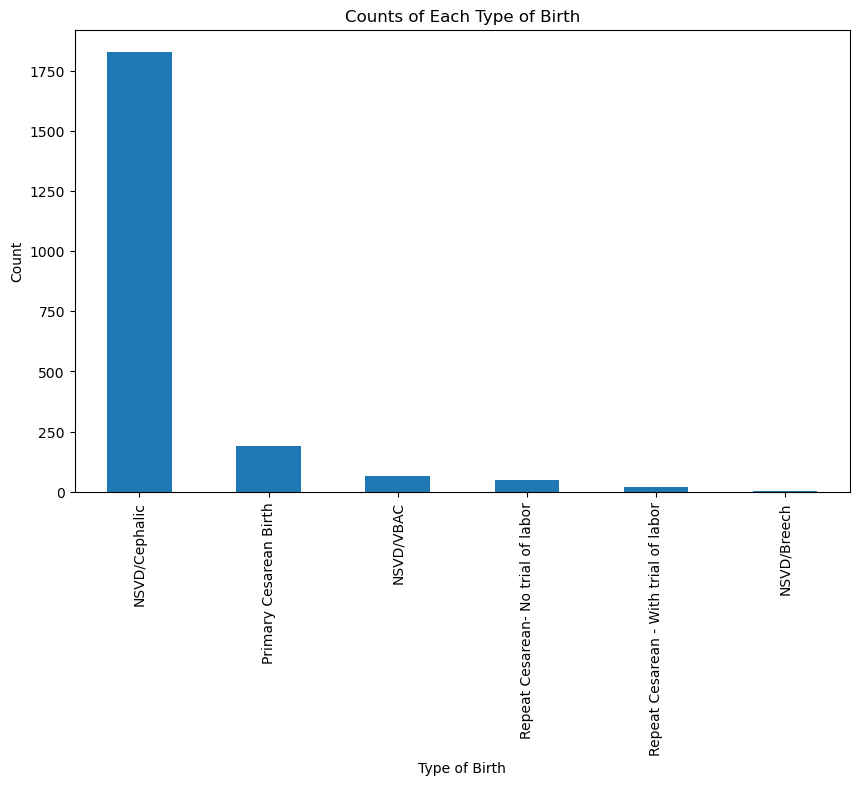

In [66]:
import matplotlib.pyplot as plt

# Get the value counts for the "Type of Birth" column
type_counts = pandas_cleaned_data["Type of Birth"].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
type_counts.plot(kind='bar')
plt.xlabel("Type of Birth")
plt.ylabel("Count")
plt.title("Counts of Each Type of Birth")
plt.show()

## Before Birth Random Forest

In [67]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

X = pandas_cleaned_data[features["Before_Labor"]]
y = pandas_cleaned_data["Type of Birth"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
validation_accuracy = cv_scores.mean()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Validation Accuracy (5-Fold CV):", validation_accuracy)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("The initial random forest forecast displays an accuracy of 85%. This is the starting point without any parameter changes/adjustments.")

c:\Users\raymm\anaconda3\envs\dev\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Validation Accuracy (5-Fold CV): 0.860788675429727
Accuracy: 0.8703703703703703
Classification Report:
                                        precision    recall  f1-score   support

                        NSVD/Cephalic       0.88      1.00      0.93       365
                            NSVD/VBAC       0.50      0.42      0.45        12
               Primary Cesarean Birth       0.75      0.09      0.15        35
Repeat Cesarean - With trial of labor       0.00      0.00      0.00         5
   Repeat Cesarean- No trial of labor       1.00      0.27      0.42        15

                             accuracy                           0.87       432
                            macro avg       0.63      0.35      0.39       432
                         weighted avg       0.85      0.87      0.83       432

The initial random forest forecast displays an accuracy of 85%. This is the starting point without any parameter changes/adjustments.


c:\Users\raymm\anaconda3\envs\dev\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raymm\anaconda3\envs\dev\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raymm\anaconda3\envs\dev\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [30]:
importances = model.feature_importances_
feature_names = X.columns 

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
# importance_df["Short Feature"] = importance_df["Feature"].apply(lambda x: x[:15] + '...' if len(x) > 20 else x)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df)

                                                Feature  Importance
159                          PH [Cesarean Birth(s)]_Yes    0.095296
4                                                   BMI    0.047062
2     Enter either pregravid weight or weight at ini...    0.043610
0                                                   Age    0.042681
3                                      Height in inches    0.035071
...                                                 ...         ...
464                       Estimated Due Date_2020-12-04    0.000000
1356                      Estimated Due Date_2024-05-27    0.000000
204                       Estimated Due Date_2019-09-09    0.000000
1360                      Estimated Due Date_2024-05-31    0.000000
588                       Estimated Due Date_2021-06-08    0.000000

[1591 rows x 2 columns]


In [31]:
importance_df

,Feature,Importance
159,PH [Cesarean Birth(s)]_Yes,0.095296
4,BMI,0.047062
2,Enter either pregravid weight or weight at ini...,0.043610
0,Age,0.042681
3,Height in inches,0.035071
...,...,...
464,Estimated Due Date_2020-12-04,0.000000
1356,Estimated Due Date_2024-05-27,0.000000
204,Estimated Due Date_2019-09-09,0.000000
1360,Estimated Due Date_2024-05-31,0.000000


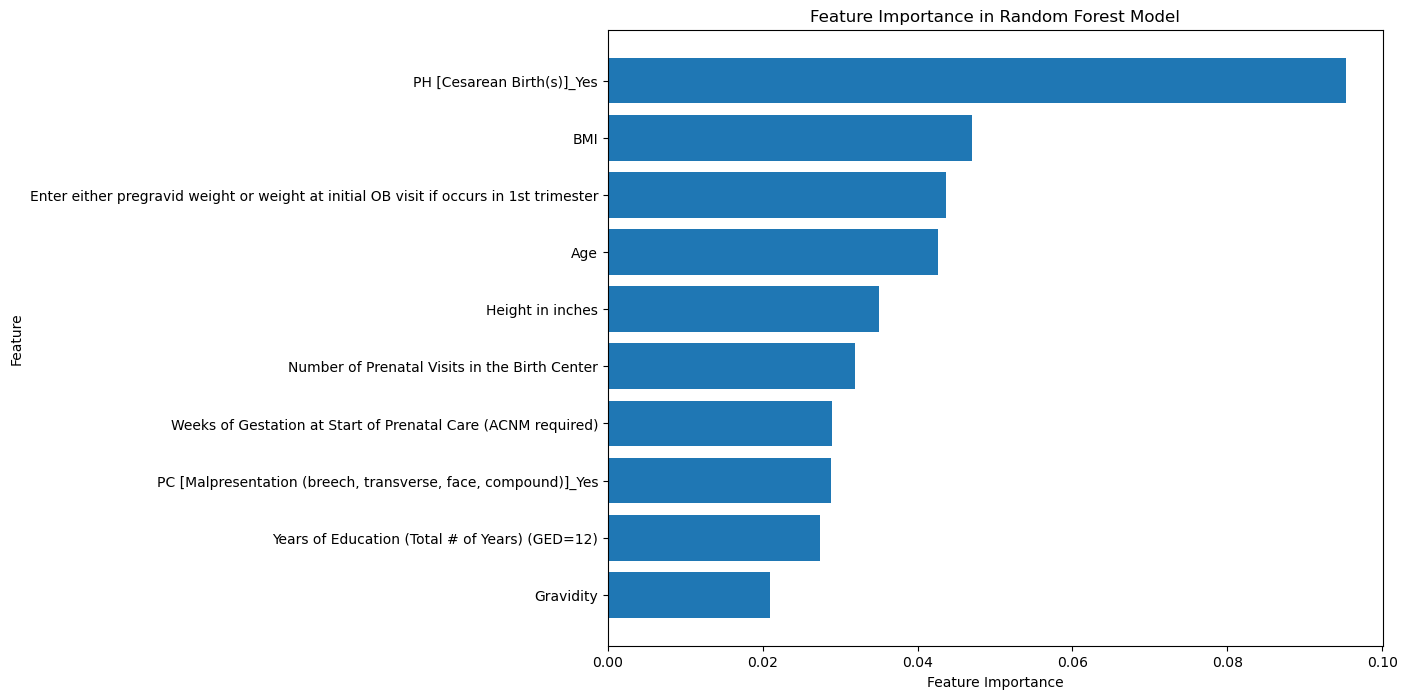

In [32]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"][0:10], importance_df["Importance"][0:10])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

## During Birth Random Forest

In [33]:
X = pandas_cleaned_data[features["During_Labor"]]
y = pandas_cleaned_data["Type of Birth"]

X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(random_state=42)

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
validation_accuracy = cv_scores.mean()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Validation Accuracy (5-Fold CV):", validation_accuracy)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

c:\Users\raymm\anaconda3\envs\dev\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Validation Accuracy (5-Fold CV): 0.8984951129086621
Accuracy: 0.9097222222222222
Classification Report:
                                        precision    recall  f1-score   support

                        NSVD/Cephalic       0.95      0.99      0.97       365
                            NSVD/VBAC       1.00      0.08      0.15        12
               Primary Cesarean Birth       0.59      0.77      0.67        35
Repeat Cesarean - With trial of labor       0.00      0.00      0.00         5
   Repeat Cesarean- No trial of labor       0.60      0.20      0.30        15

                             accuracy                           0.91       432
                            macro avg       0.63      0.41      0.42       432
                         weighted avg       0.90      0.91      0.89       432



c:\Users\raymm\anaconda3\envs\dev\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raymm\anaconda3\envs\dev\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\raymm\anaconda3\envs\dev\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
importances = model.feature_importances_
feature_names = X.columns 

importance_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
# importance_df["Short Feature"] = importance_df["Feature"].apply(lambda x: x[:15] + '...' if len(x) > 20 else x)
importance_df = importance_df.sort_values(by="Importance", ascending=False)

print(importance_df)

                                               Feature  Importance
67                               Length of 2SL_Unknown    0.216887
59                               Length of 1SL_Unknown    0.071823
3    Place of First Admission to Care_Collaborative...    0.051827
76   Time from Rupture of Membranes to Birth_Less t...    0.039040
91    IC [Indeterminate or Concerning FHR Pattern]_Yes    0.037212
..                                                 ...         ...
47   Primary Indication for Induction of Labor [Oth...    0.000000
120                      IC [Other]_Scheduled Cesarean    0.000000
24   Primary Indication for Induction of Labor [Oth...    0.000000
113               IC [Other]_NUCHAL CORD X1; BODY CORD    0.000000
94   IC [Maternal Complication or Illness Resulting...    0.000000

[145 rows x 2 columns]


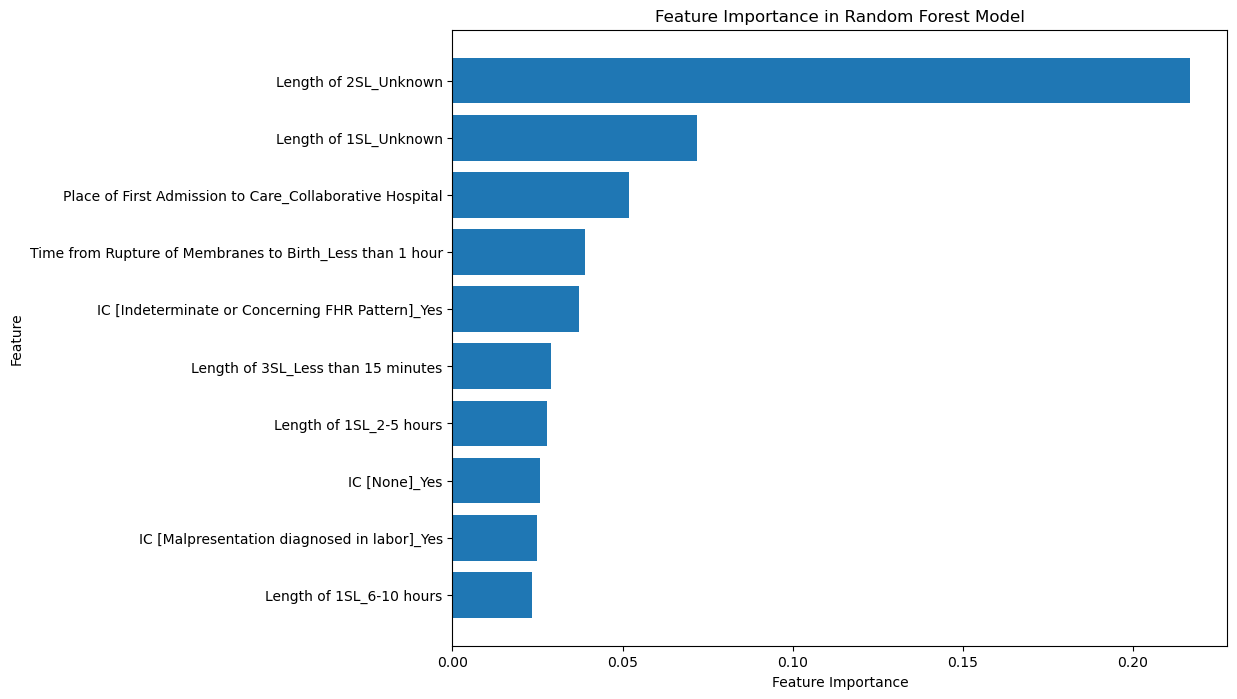

In [35]:
plt.figure(figsize=(10, 8))
plt.barh(importance_df["Feature"][0:10], importance_df["Importance"][0:10])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()